   # Universidad Autónoma de Nuevo León
   ## Mineria de Datos Proyecto Final
   ## Docente: MC. Mayra Cristina Berrones Reyes

   ### Autor:  Lara Zarzosa Myriam Veronica_1485695
   ### Grupo 001 | Periodo Enero - Junio 2020 
   #### San Nicolás de los Garza, Nuevo León 
   
   # Diabetes

## Introducción
## .- Base de Datos

### Tenemos una base de datos basada en datos de diabetes. En la base de datos contiene un modelado de datos importantes a considerar en personas con diabetes por minería de datos a partir de estudios realizados a personas con esta enfermedad. Dentro de la base de datos se analizaron diferentes personas en el cual se le hicieron examenes clinicos para obtner resultados como "Presion Sanguinea" "Indice de Masa Corporal" "Glucosa" "Embarazos","Espesor de la piel" etc. Para obtener el resultado de las edades en las cuales tienen una presion sanguinea alta  se obtuvieron en base a la evaluacion realizada por expertos en la salud. Para más detalles, consulte: https://www.kaggle.com/abinayathiyagapari/diabetes.

## Descripcion de las los nombres de las columna.
### 1 - Embarazos : cantidad de embarazos que ha tenido la persona.
### 2 - Glucosa: los niveles de azucar en la sangre.
### 3 - Presion sanguinea:  tensión ejercida por la sangre registrada en la persona.
### 4 - Espesor de la piel: la cantidad de espesor de la piel.
### 5 - Insulina: La cantidad de insulina suministrada en el vino. 
### 6 - BMI: Indice de masa corporal que tiene el paciente.
### 7 - DiabetesPedigreeFunction: Nivel de funcionalidad con diabetes. 
### 8 - Años: Año del paciente
### 9 - Outcome: Si tuvo registro de salida en la diabetes.


## Objetivos 

### El objetivo de esta investigacion sobre la diabetes es informar sobre el registro de pacientes cuales son los factores a tomar en cuenta que tienden a presentar esta enfermedad, cómo es la relacion de dicha enfermedad teniendo en cuenta su presion sanguinea, edad y su Glucosa.

## Desarrollo de los dos puntos de Limpieza de datos y Visualización de datos


### 1. Leer el archivo csv y presentar los datos de manera sencilla. 
### Comenzaremos importando las librerías que nos asistirán para ejecutar el algoritmo y graficar.

In [43]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import pairwise

from mpl_toolkits.mplot3d import Axes3D
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')


### Importamos el archivo csv indicando la direccion donde tenemos nuestros archivo guardado

In [4]:
datos = pd.read_csv('C:/Users/ventus/Downloads/Examen_MD4ta/datasets_diabetes.csv')

### Mostramos los primeros 5 registros de nuestra BD

In [6]:
datos.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## 2. Describir los datos por columnas y tipo.  

### Mostramos informacion estadistica que nos provee Pandas dataframe (cantidad de registros, media,promedio, minimo valor, max valor...)¶

In [8]:
datos.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Mostramos el tipo de dato de las columnas de nuestra BD

In [9]:
datos.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

### Cambiamos el nombre de las columnas a idioma español

In [12]:
datos.rename(columns={
    'Pregnancies':'Embarazos',
    'Glucose':'Azucar',
    'BloodPressure':'Presion_sangre',
    'SkinThickness':'Grosor_piel',
    'Insulin':'Insulina',
    'Age':'Años',
    'Outcome':'Resultado'})

,Embarazos,Azucar,Presion_sangre,Grosor_piel,Insulina,BMI,DiabetesPedigreeFunction,Años,Resultado
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## 3.Hacer conjunto de datos

### Obtenemos la suma, media, min y max valor para las columnas de Azucar ("Glucosa") y Resultado (Outcome) 
#### Sacaremos los datos y seran guardadas en variable a y b respectivamente y porteriormente haremos una impresion de los resultados.

In [14]:
a=datos['Glucose'].sum()
b=datos['Outcome'].sum()
print('Suma azucar:',a,'Suma resultado:',b)
a=datos['Glucose'].mean()
b=datos['Outcome'].mean()
print('Media azucar:',a,'Media resultado:',b)
a=datos['Glucose'].median()
b=datos['Outcome'].median()
print('Mediana azucar:',a,'Mediana resultado:',b)
a=datos['Glucose'].min()
a1=datos['Glucose'].max()
b=datos['Outcome'].min()
b1=datos['Outcome'].max()
print('Min azucar: ',a,'Max azucar: ',a1)
print('Min resultado:',b,'Max resultado: ',b1)

Suma azucar: 92847 Suma resultado: 268
Media azucar: 120.89453125 Media resultado: 0.3489583333333333
Mediana azucar: 117.0 Mediana resultado: 0.0
Min azucar:  0 Max azucar:  199
Min resultado: 0 Max resultado:  1


In [30]:
a=datos['BloodPressure'].sum()
b=datos['Age'].sum()
print('Suma presion_sangre:',a,'Suma años:',b)
a=datos['BloodPressure'].mean()
b=datos['Age'].mean()
print('Media presion_sangre:',a,'Media años:',b)
a=datos['BloodPressure'].median()
b=datos['Age'].median()
print('Mediana presion_sangre:',a,'Mediana años:',b)
a=datos['BloodPressure'].min()
a1=datos['BloodPressure'].max()
b=datos['Age'].min()
b1=datos['Age'].max()
print('Min presion_sangre: ',a,'Max presion_sangre: ',a1)
print('Min años:',b,'Max años: ',b1)

Suma presion_sangre: 53073 Suma años: 25529
Media presion_sangre: 69.10546875 Media años: 33.240885416666664
Mediana presion_sangre: 72.0 Mediana años: 29.0
Min presion_sangre:  0 Max presion_sangre:  122
Min años: 21 Max años:  81


### Obtenemos la mediana del resultado para ver la tendencia central de estos datos

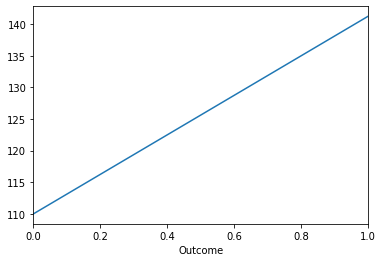

In [16]:
datos.groupby('Outcome')['Glucose'].mean().plot.line()

#### En esta grafica de arriba observamos la tendencia a tener diabetes (en promedio) en relacion al nivel de azucar proporcionada, podemos ver que las personas con un nivel de azucar alto tienden a tener diabetes.

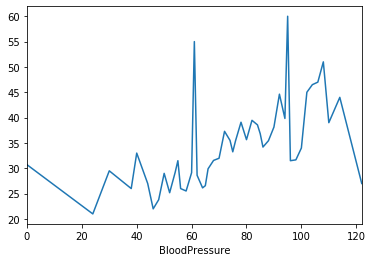

In [31]:
datos.groupby('BloodPressure')['Age'].mean().plot.line()

#### En esta grafica de arriba observamos el aumento de años(en promedio) en relacion de la presion de sangre proporcionada, podemos ver que las personas con años de 30 a 55 mantienen una misma presion de sangres

### Crearemos una clase con Nivel de glucosa >= 117 y Presion de Sangre >= 0
#### Creamos un nuevo archivo con el resultado de nuestra clase, indicamos la ruta donde será guardado.

In [17]:
clase1 = datos[(datos['Glucose']>=117.0) & (datos['Outcome']>=0)]
clase1.to_csv('C:/Users/ventus/Downloads/Examen_MD4ta/Agrupacion_azucar_result.csv',index=False)

### Hacemos la lectura de nuestro archivo

In [19]:
reviews = pd.read_csv('C:/Users/ventus/Downloads/Examen_MD4ta/Agrupacion_azucar_result.csv',index_col=0)

### Mostramos los primeros registros de nuestro nuevo archivo 'Agrupacion_presionsangre_años.csv'

In [20]:
reviews.head()

,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,,,,,,,,
6,148,72,35,0,33.6,0.627,50,1
8,183,64,0,0,23.3,0.672,32,1
0,137,40,35,168,43.1,2.288,33,1
2,197,70,45,543,30.5,0.158,53,1
8,125,96,0,0,0.0,0.232,54,1


# Visualizacion de Datos:

### Realizamos un histograma para observar el nivel de glucosa con mas frecuencia son de 200 y resulta positivo

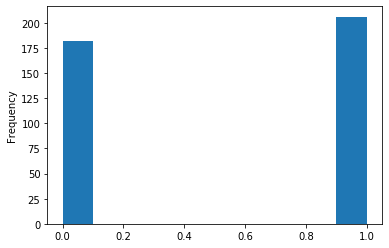

In [21]:
reviews[reviews['Glucose'] >= 117]['Outcome'].plot.hist()

#### En la siguiente grafica se puede concluir que el nivel de azucar  y el resultado estan relacionados, se ve la relacion del resultado positivo cuando el nivel de gluso es superior, aunque en el registro de nuestra BD nos percatamos que hay una aglomeracion de positivo cuando los resultados de glucosa son superior a 170

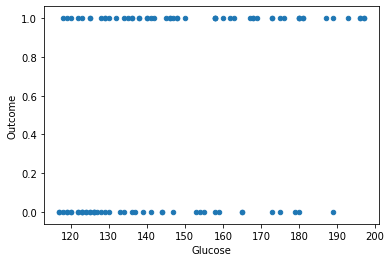

In [25]:
a=100
reviews[reviews['Outcome'] >= 0].sample(a).plot.scatter(x='Glucose', y='Outcome')

### Obtenemos la mediana de años para ver la tendencia central de estos datos


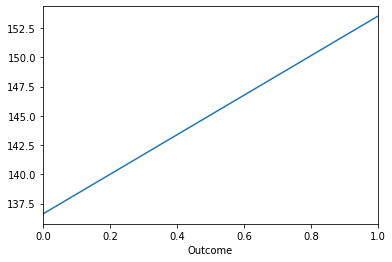

In [26]:
reviews.groupby('Outcome')['Glucose'].mean().plot.line()

#### En esta grafica de arriba  observamos el aumento de azucar (en promedio) en relacion al resultado de diabetes proporcionada por los usuarios, podemos ver que con nivel de glucosa mayor es mayor la tendencia a tener diabetes.

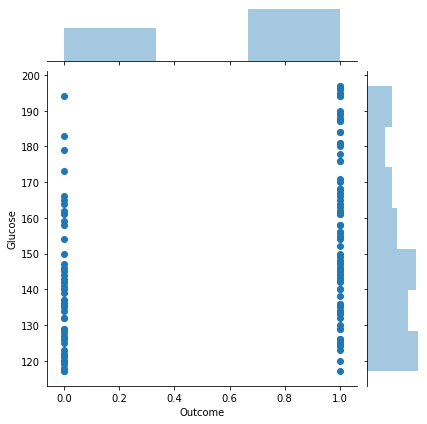

In [28]:
reviews_filter = reviews[reviews.Age >= 40]
sb.jointplot("Outcome", "Glucose", data=reviews_filter[['Glucose', 'Outcome']],);

###  Por último Se puede observar la dispersion en base a la glucosa y sus resultados filtrados por resultados, se pueden identificar casos aislados con rangos fuera de lo normal. Hay cierta aglomeracion en glucosa de 140 a 180, lo que se podria decir que ese seria un resultado positivo estandar en base a su nivel de glucosa, pero tambien hay algunos casos que sobrepasan este nivel, podria ser debido a alguna enfermedad, cuidados alimenticios que pueda tener la persona.

In [37]:
X = np.array(reviews[["Glucose","BloodPressure","Age"]])
y = np.array(reviews['Outcome'])
X.shape

(388, 3)

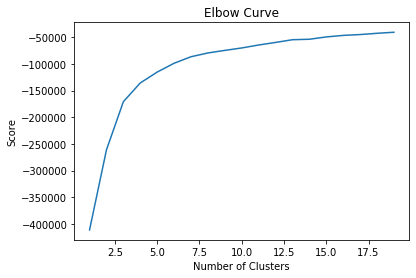

In [38]:
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X).score(X) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

### La curva es suave, consideramos 5 como un buen valor de K

In [39]:
kmeans = KMeans(n_clusters=5).fit(X)
centroids = kmeans.cluster_centers_
print(centroids)

[[155.7826087   75.56521739  36.25      ]
 [127.06766917  70.2406015   27.14285714]
 [138.38888889   0.          35.33333333]
 [133.33766234  82.41558442  49.55844156]
 [183.76470588  76.17647059  37.98529412]]


###Grafica 3D para grupos y ver si diferencian *Estrella centro cluster
### Predicting the clusters

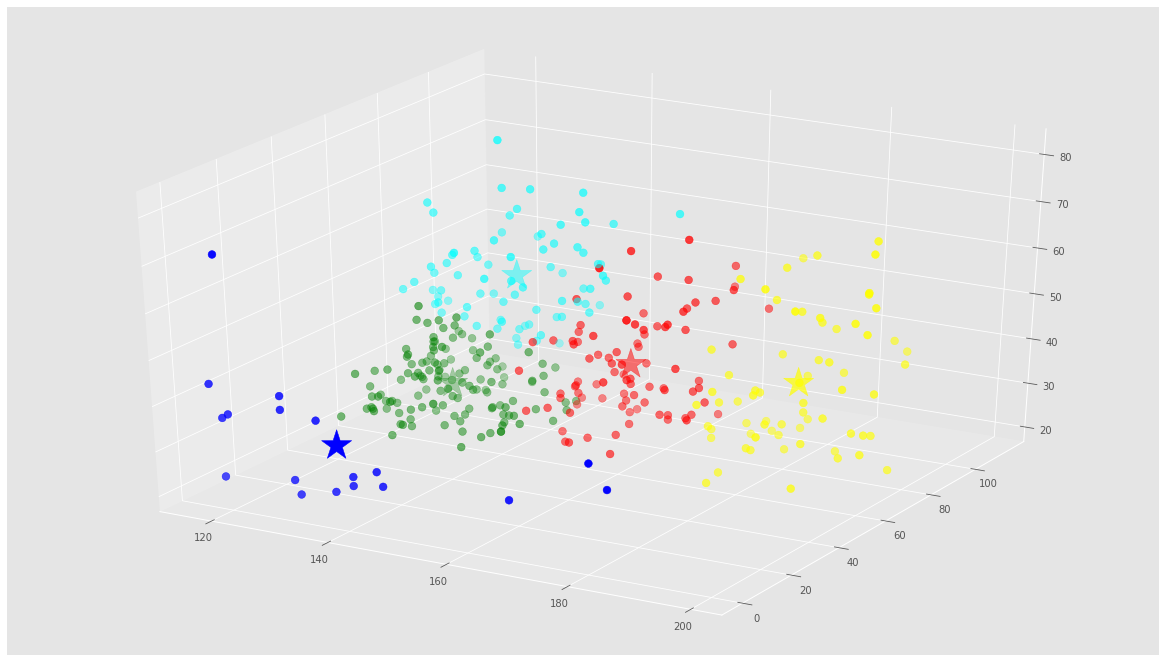

In [44]:
labels = kmeans.predict(X)
# Getting the cluster centers
C = kmeans.cluster_centers_
colores=['red','green','blue','cyan','yellow']
asignar=[]
for row in labels:
    asignar.append(colores[row])

fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=asignar,s=60)
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c=colores, s=1000)

## Conclusiones


### Como conclusion podemos mencionar que las personas que tienen un nivel de glucosa elevado son las que tienden a presentar un resultado positivo a la enfermedad de diabetes. y que el nivel de presion sanguinea es otro factor determinante.

## Trabajo a futuro
   ### La tecnica a utilizar seria de clustering porque ahi podemos visualizar como mas de tres factores influyen en el resultado positivo de la diabetes.